# Simulation notebook
This notebook is used for testing the Nile model on the single run *simulation* (not optimization) mode.

In [2]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pickle

from output_analysis.plotter import HydroModelPlotter
# from plotter.plotting_functions import plot_two_lines_together, line_graph_with_limits
from experimentation.data_generation import generate_input_data

import sys

my_path = sys.path[0]
while my_path[-1] != "/" and my_path[-1] != "\\":
    my_path = my_path[:-1]
sys.path.insert(1, my_path + "Model")

from model.model_nile import ModelNile

In [4]:
model = ModelNile("None")
model_plotter = HydroModelPlotter(model)

In [5]:
model = generate_input_data(model, sim_horizon=20)

In [6]:
pcount = model.overarching_policy.get_total_parameter_count()
np.random.seed(123)
random_policy = np.random.rand(pcount)
zero_policy = np.repeat(0, pcount)

ValueError: cannot reshape array of size 3120 into shape (20,12)

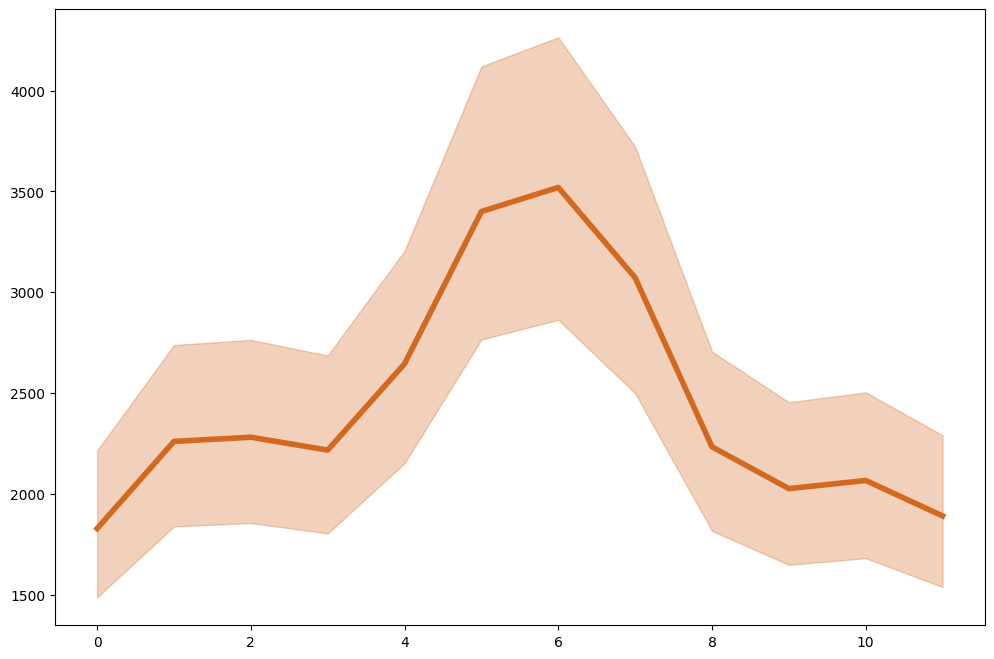

In [17]:
trial_policies = [random_policy, zero_policy]

for policy in trial_policies:
    model.evaluate(policy)
    model_plotter.plot_received_vs_demand_for_district_raw_condensed("Egypt")
    model_plotter.plot_received_vs_demand_for_district_raw_condensed("Gezira")

    for dam in model.reservoir_names:
        model_plotter.plot_level_with_limits(dam)
        model_plotter.plot_levels_condensed(dam)

# Plotting

Below code block will be used to plot some of the actual physical quantities (summary releases across reservoirs, irrigation per catchment, average environmental flows) based on the vectors that were produced by simulation runs: